# Correlation with Gaussian filter on salt and pepper noisy images
----
`Roll: CS20B1016, Name: V Nagasai`

----

**<u>Problem Statement:</u>**

1. Download Lena color image, convert it to grayscale image and add salt and pepper
noise with noise quantity 0.1,0.2 up to 1 and generate 10 noisy images.
2. Correlate each noisy image with Gaussian filters of varying size. Filter size can be
3 x 3, 5 x 5 and 7 x 7.

**<u>Note:</u>**

Use σ=1 for Gaussian filter. Use predefined as well as user defined functions for the above
problems (for correlation).

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

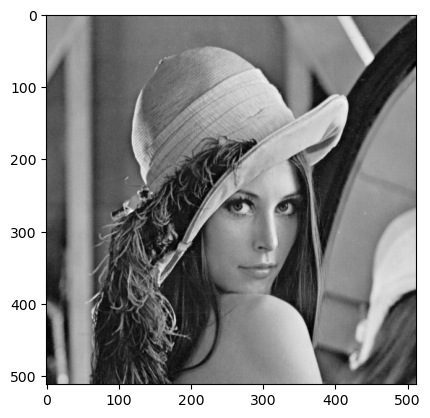

In [127]:
img = cv2.imread("Lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.show()

In [128]:
#Function for plotting array of images
def plot_images(images, rows, cols, imageTitles=[]):
	if(len(imageTitles) == 0):
		imageTitles = [f'Image {i}' for i in range(1, rows*cols + 1)]
	plt.figure(figsize=(2.2*cols, 2.2*rows))
	plt.subplots_adjust(bottom=0.0, left=.01, right=.99, top=.90, hspace=.20)
	for i in range(rows*cols):
		plt.subplot(rows, cols, i+1)
		plt.imshow(images[i], cmap="gray")
		plt.title(imageTitles[i])
		plt.axis("off")

In [129]:
def salt_pepper_noise(img: np.ndarray, noise: float):
	m, n = img.shape
	noisy_img = img.copy()
	for _ in range(round(noise*m*n)):
		x, y = random.randint(0, m-1), random.randint(0, n-1)
		noisy_img[x][y] = 0
		noisy_img[y][x] = 255
	return noisy_img

In [130]:
def gaussian_kernel(kernel_size: tuple, sigma):
		a, b = kernel_size
		x, y = np.meshgrid(np.linspace(-1, 1, b), np.linspace(-1, 1, a))
		kernel = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x**2+y**2)/2*sigma**2)
		kernel = kernel/np.sum(kernel)
		return kernel

In [131]:
def overlap(padded_img: np.ndarray, x: int, y: int, kernel: np.ndarray):
	m, n = kernel.shape
	a, b = (m-1)//2, (n-1)//2
	sum = 0
	for t in range(-b, b+1):
		for s in range(-a, a+1):
			sum += padded_img[x+s, y+t]*kernel[s+a, t+b]
	return sum

def correlate(img: np.ndarray, kernel: np.ndarray):
	m, n = img.shape
	a, b = kernel.shape
	if(a%2 == 0 or b%2 == 0): raise Exception("Please use odd kernels")
	padded_img = np.pad(img, ((a-1, a-1), (b-1, b-1)))
	correlated_img = np.empty((m, n))
	for i in range(m):
		for j in range(n):
			correlated_img[i, j] = overlap(padded_img, i, j, kernel)
	return correlated_img

In [132]:
noises = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
cor_imgs = {}
for size in kernel_sizes:
    for noise in noises:
        cor_imgs[f"Size: {size}, Noise: {noise}"] = correlate(salt_pepper_noise(img, noise), gaussian_kernel(size, 1))
        print(f"Generated correlated image of noisy image of salt and pepper noise {noise} with Gaussian kernel size {size}")

Generated correlated image of noisy image of salt and pepper noise 0.1 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.2 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.3 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.4 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.5 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.6 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.7 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.8 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.9 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noi

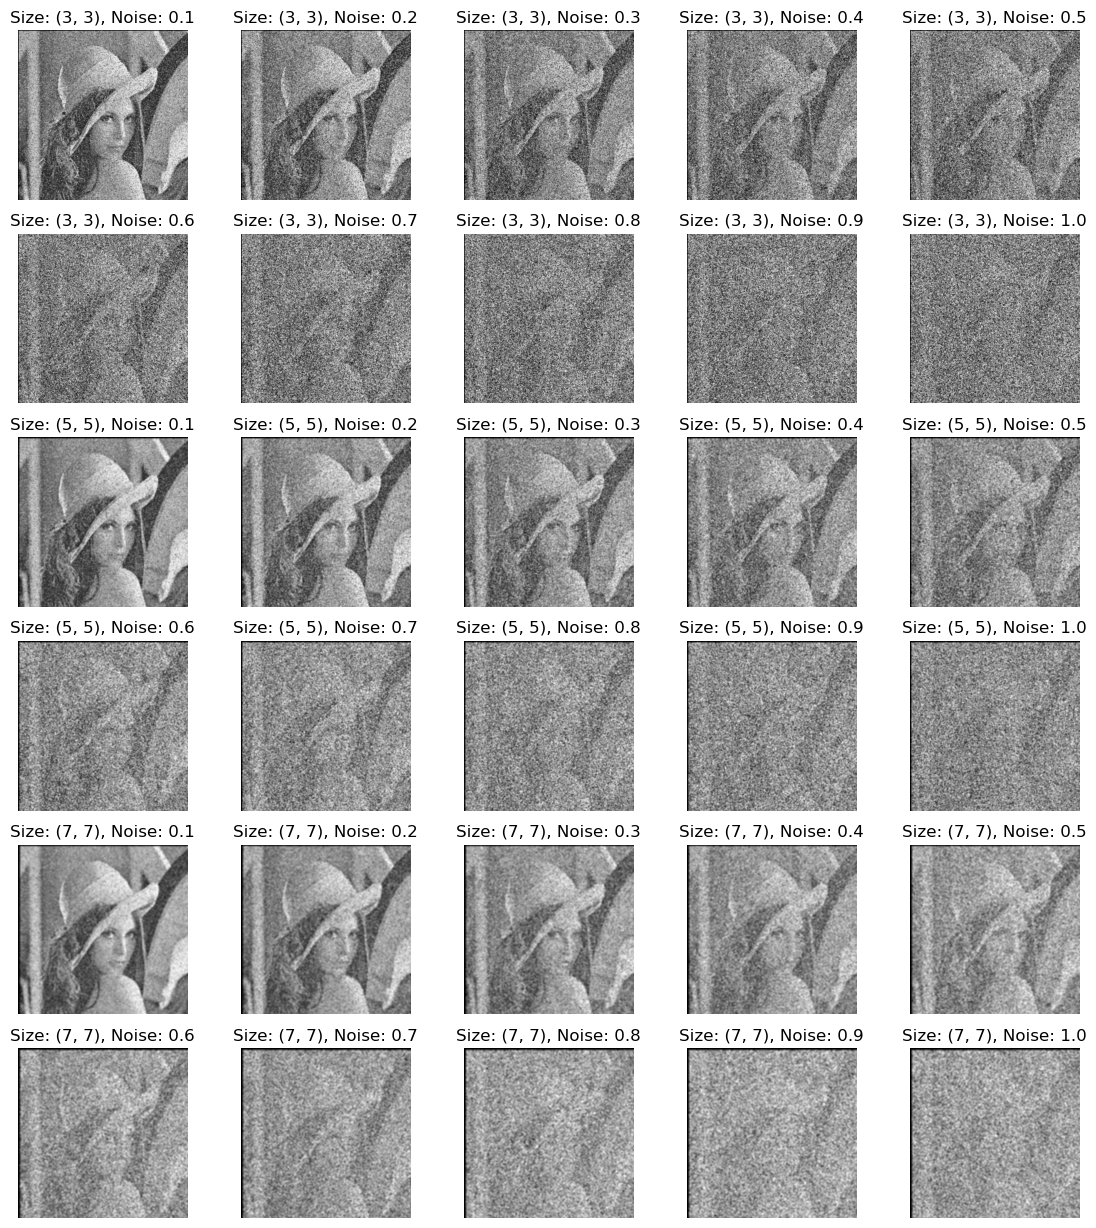

In [133]:
plot_images(list(cor_imgs.values()), 6, 5, list(cor_imgs.keys()))

In [134]:
cor_imgs_builtin = {}
for size in kernel_sizes:
    for noise in noises:
        cor_imgs_builtin[f"Size: {size}, Noise: {noise}"] = correlate(salt_pepper_noise(img, noise), cv2.getGaussianKernel(size[0], 1))
        print(f"Generated correlated image of noisy image of salt and pepper noise {noise} with Gaussian kernel size {size}")

Generated correlated image of noisy image of salt and pepper noise 0.1 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.2 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.3 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.4 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.5 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.6 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.7 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.8 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noise 0.9 with Gaussian kernel size (3, 3)
Generated correlated image of noisy image of salt and pepper noi

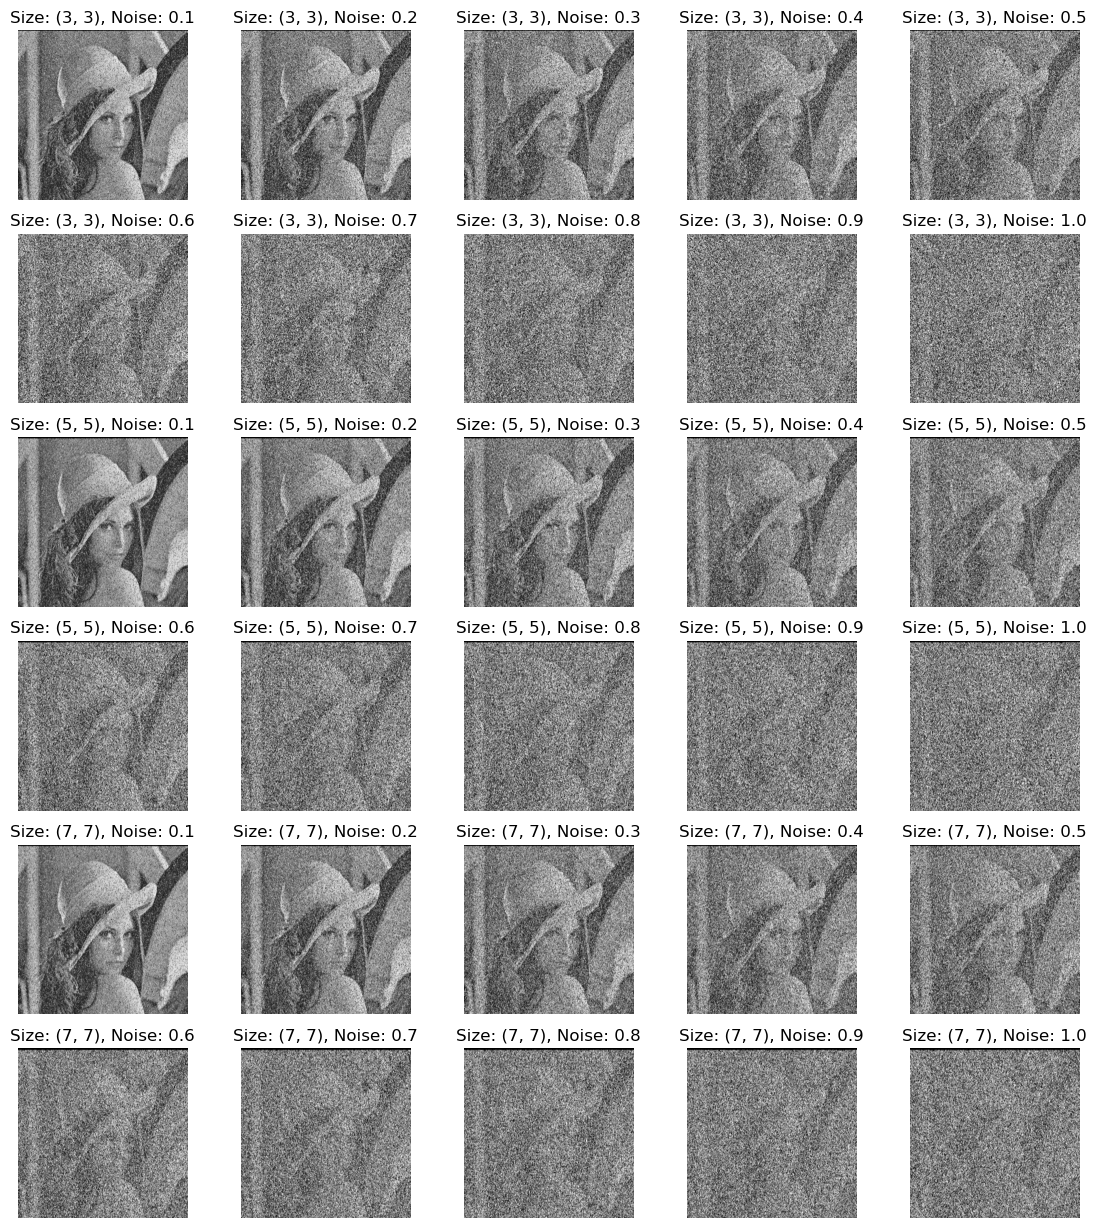

In [135]:
plot_images(list(cor_imgs_builtin.values()), 6, 5, list(cor_imgs_builtin.keys()))